# Section 3.5: Uniform E-field approximation works well for modeling tACS at the cellular level

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import pickle
import simnibs
import os, subprocess
import scipy
import plot_functions
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import scipy.stats as stats

In [2]:
# layer 5 roi surface mesh with 1000 elements
L5_surf_roi  = simnibs.read_stl(r'data_paper\Layer5_roi_pymeshlab.stl')
faces        = L5_surf_roi.elm.node_number_list[:, 0:3] - 1
faces_center = L5_surf_roi.elements_baricenters().value
vertices     = L5_surf_roi.nodes.node_coord
# layer 5 roi surface mesh without discretized
L5_surf        = simnibs.read_msh(r'data_paper\Layer5_roi.msh')
faces_0        = L5_surf.elm.node_number_list[:, 0:3] - 1
faces_center_0 = L5_surf.elements_baricenters().value
vertices_0     = L5_surf.nodes.node_coord

# Figure 8(a): polarization difference

In [22]:
# Load somaticc polarization of uniform and nonuniform E-field
# unifrom EF
data = pickle.load(open('data_paper/L5PC_Clone4_polarization_ROISurf_uniform_tACS2mA10Hz_EFAtSoma.p', 'rb'))
polarization_uniform = np.array([item[1] for item in data])
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_uniform, function='linear')
polarization_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# nonuniform EF
data = pickle.load(open('data_paper/L5PC_Clone4_polarization_ROISurf_nonUniform_tACS2mA10Hz_scalingFactor2.p', 'rb'))
polarization_nonUniform = np.array([item[1] for item in data])
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_nonUniform, function='linear')
polarization_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# absolute error
polarization_error = polarization_uniform - polarization_nonUniform
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_error, function='linear')
polarization_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# relative error
polarization_error_percent = 100 * (polarization_uniform - polarization_nonUniform) / polarization_nonUniform
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_error_percent, function='linear')
polarization_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

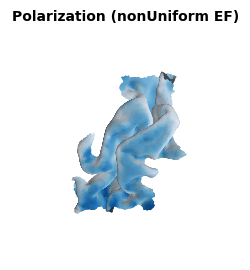

In [23]:
tempdata             = polarization_nonUniform_interp
value_min, value_max = 0, 0.1
color_numPoint       = 30000
color_name           = 'Blues'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='symmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('Polarization (nonUniform EF)', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])

# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_polarization_nonUniformEF_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

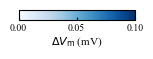

In [9]:
fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = plt.get_cmap('Blues', lut=100)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([0, 0.05, 0.1])
cbar.ax.set_xlabel('$\Delta V_\mathrm{m}$ (mV)', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6c-4.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

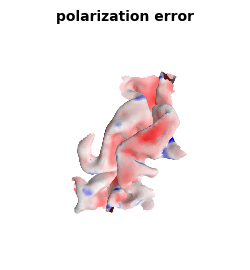

In [24]:
tempdata             = polarization_error_interp
value_min, value_max = -0.005, 0.02
color_numPoint       = 30000
color_name           = 'bwr'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='nonsymmetry')

custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('polarization error', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_abosolute_error_of_polarization_between_uniform_and_nonUniform_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

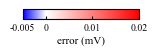

In [25]:
num_negative = int(np.abs(value_min) * 1e5)
num_positive = int(np.abs(value_max) * 1e5)
cmap = plt.get_cmap('bwr', lut=(num_negative + num_positive)*2+1)
index_negative = np.array([int(i) for i in np.linspace(0, num_negative + num_positive - 1, num_negative)])
index_positive = np.array([int(i) for i in np.linspace(num_negative + num_positive + 1, (num_negative + num_positive)*2, num_positive)])
index_all = np.hstack((index_negative, np.array([num_negative + num_positive]), index_positive))
list_color_cmap = [cmap(i) for i in index_all]

fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = matplotlib.colors.ListedColormap(list_color_cmap)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([-0.005, 0, 0.01,  0.02])
cbar.ax.set_xticklabels([-0.005, 0, 0.01,  0.02])
cbar.ax.set_xlabel('error (mV)', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6c-5.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

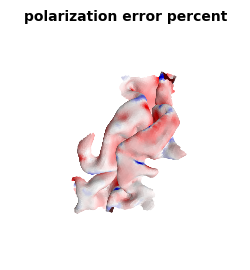

In [27]:
tempdata             = polarization_error_percent_interp
value_min, value_max = -30, 60
color_numPoint       = 30000
color_name           = 'bwr'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='nonsymmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('polarization error percent', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_relative_error_of_polarization_between_uniform_and_nonUniform_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

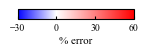

In [28]:
num_negative = int(np.abs(value_min) * 1e2)
num_positive = int(np.abs(value_max) * 1e2)
cmap = plt.get_cmap('bwr', lut=(num_negative + num_positive)*2+1)
index_negative = np.array([int(i) for i in np.linspace(0, num_negative + num_positive - 1, num_negative)])
index_positive = np.array([int(i) for i in np.linspace(num_negative + num_positive + 1, (num_negative + num_positive)*2, num_positive)])
index_all = np.hstack((index_negative, np.array([num_negative + num_positive]), index_positive))
list_color_cmap = [cmap(i) for i in index_all]

fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = matplotlib.colors.ListedColormap(list_color_cmap)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([-30, 0, 30, 60])
cbar.ax.set_xlabel('% error', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)

# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6c-6.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

# Figure 8(b): PLV difference

In [30]:
# Load phase entrainment of uniform and nonuniform E-field
# unifrom EF
dataPath    = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_uniform.p'
data        = pickle.load(open(dataPath, 'rb'))
plv_uniform = np.array([item[0] for item in data])
pph_uniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_uniform, function='linear')
plv_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
rbf                = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_uniform, function='linear')
pph_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# nonuniform EF
dataPath       = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_nonUniform.p'
data           = pickle.load(open(dataPath, 'rb'))
plv_nonUniform = np.array([item[0] for item in data])
pph_nonUniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                   = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_nonUniform, function='linear')
plv_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
rbf                   = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_nonUniform, function='linear')
pph_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# absolute error
plv_error        = plv_uniform - plv_nonUniform
rbf              = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_error, function='linear')
plv_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

pph_error        = pph_uniform - pph_nonUniform
rbf              = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error, function='linear')
pph_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# relative error
plv_error_percent        = 100 * (plv_uniform - plv_nonUniform) / plv_nonUniform
rbf                      = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_error_percent, function='linear')
plv_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

pph_error_percent        = 100 * (pph_uniform - pph_nonUniform) / pph_nonUniform
rbf                      = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error_percent, function='linear')
pph_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

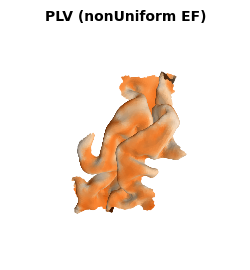

In [11]:
tempdata             = plv_nonUniform_interp
value_min, value_max = 0.008, 0.032
color_numPoint       = 30000
color_name           = 'Oranges'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='symmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('PLV (nonUniform EF)', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])

# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_PLV_nonUniformEF_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

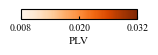

In [38]:
fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = plt.get_cmap('Oranges', lut=100)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([0.008, 0.02, 0.032])
cbar.ax.set_xlabel('PLV', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6a-4.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

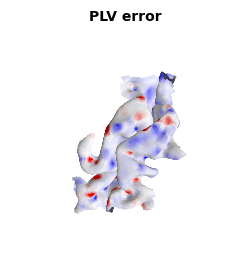

In [31]:
tempdata             = plv_error_interp
value_min, value_max = -0.002, 0.001
color_numPoint       = 30000
color_name           = 'bwr'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='nonsymmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('PLV error', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_abosolute_error_of_PLV_between_uniform_and_nonUniform_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

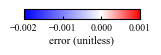

In [32]:
num_negative = int(np.abs(value_min) * 1e5)
num_positive = int(np.abs(value_max) * 1e5)
cmap = plt.get_cmap('bwr', lut=(num_negative + num_positive)*2+1)
index_negative = np.array([int(i) for i in np.linspace(0, num_negative + num_positive - 1, num_negative)])
index_positive = np.array([int(i) for i in np.linspace(num_negative + num_positive + 1, (num_negative + num_positive)*2, num_positive)])
index_all = np.hstack((index_negative, np.array([num_negative + num_positive]), index_positive))
list_color_cmap = [cmap(i) for i in index_all]

fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = matplotlib.colors.ListedColormap(list_color_cmap)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([-0.002, -0.001, 0, 0.001])
cbar.ax.set_xlabel('error (unitless)', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6a-5.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

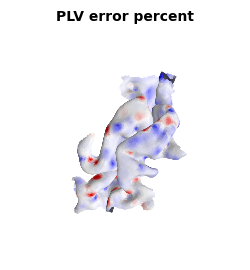

In [34]:
tempdata             = plv_error_percent_interp
value_min, value_max = -12, 8
color_numPoint       = 30000
color_name           = 'bwr'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='nonsymmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('PLV error percent', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_relative_error_of_PLV_between_uniform_and_nonUniform_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

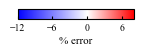

In [35]:
num_negative = int(np.abs(value_min) * 1e2)
num_positive = int(np.abs(value_max) * 1e2)
cmap = plt.get_cmap('bwr', lut=(num_negative + num_positive)*2+1)
index_negative = np.array([int(i) for i in np.linspace(0, num_negative + num_positive - 1, num_negative)])
index_positive = np.array([int(i) for i in np.linspace(num_negative + num_positive + 1, (num_negative + num_positive)*2, num_positive)])
index_all = np.hstack((index_negative, np.array([num_negative + num_positive]), index_positive))
list_color_cmap = [cmap(i) for i in index_all]

fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = matplotlib.colors.ListedColormap(list_color_cmap)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([-12, -6, 0, 6])
cbar.ax.set_xlabel('% error', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6a-6.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

# Figure 8(c): PPh difference

In [37]:
# Load phase entrainment of uniform and nonuniform E-field
# unifrom EF
dataPath    = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_uniform.p'
data        = pickle.load(open(dataPath, 'rb'))
pph_uniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_uniform, function='linear')
pph_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# nonuniform EF
dataPath       = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_nonUniform.p'
data           = pickle.load(open(dataPath, 'rb'))
pph_nonUniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                   = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_nonUniform, function='linear')
pph_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# absolute error
pph_error        = pph_uniform - pph_nonUniform
rbf              = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error, function='linear')
pph_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# relative error
pph_error_percent        = 100 * (pph_uniform - pph_nonUniform) / pph_nonUniform
rbf                      = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error_percent, function='linear')
pph_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

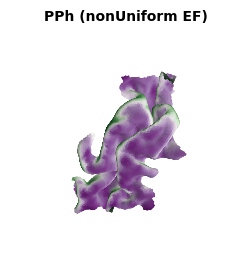

In [38]:
tempdata             = pph_nonUniform_interp
value_min, value_max = 150, 300
color_numPoint       = 30000
color_name           = 'PRGn_r'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='symmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('PPh (nonUniform EF)', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])

# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_PPh_nonUniformEF_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

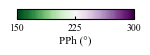

In [28]:
fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = plt.get_cmap('PRGn_r', lut=100)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([150, 225, 300])
cbar.ax.set_xlabel('PPh (°)', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6b-4.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

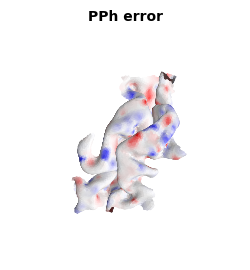

In [39]:
tempdata             = pph_error_interp
value_min, value_max = -10, 5
color_numPoint       = 30000
color_name           = 'bwr'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='nonsymmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('PPh error', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_abosolute_error_of_PPh_between_uniform_and_nonUniform_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

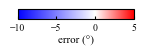

In [40]:
num_negative = int(np.abs(value_min) * 1e2)
num_positive = int(np.abs(value_max) * 1e2)
cmap = plt.get_cmap('bwr', lut=(num_negative + num_positive)*2+1)
index_negative = np.array([int(i) for i in np.linspace(0, num_negative + num_positive - 1, num_negative)])
index_positive = np.array([int(i) for i in np.linspace(num_negative + num_positive + 1, (num_negative + num_positive)*2, num_positive)])
index_all = np.hstack((index_negative, np.array([num_negative + num_positive]), index_positive))
list_color_cmap = [cmap(i) for i in index_all]

fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = matplotlib.colors.ListedColormap(list_color_cmap)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([-10, -5, 0, 5])
cbar.ax.set_xlabel('error (°)', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
# plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6b-5.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

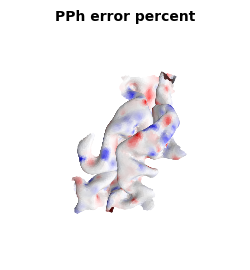

In [42]:
tempdata             = pph_error_percent_interp
value_min, value_max = -4, 2
color_numPoint       = 30000
color_name           = 'bwr'
cmap                 = plt.get_cmap(color_name, lut=color_numPoint) # .reversed() 
list_color           = plot_functions.calc_list_color(value_data=tempdata, value_min=value_min, value_max=value_max, \
                                           color_name=color_name, color_numPoint=color_numPoint, method='nonsymmetry')
custom_cmap          = ListedColormap(list_color)
# plot figures 
fig, ax = plt.subplots(1, 1, figsize=(3, 3), subplot_kw={'projection': '3d'})
polycol3d = Poly3DCollection([vertices_0[face] for face in faces_0], facecolors=list_color, edgecolors=list_color, shade=True)
ax.add_collection3d(polycol3d)
ax.set_xlim(-80, 10)
ax.set_ylim(-20, 40)
ax.set_zlim(25, 80)
ax.view_init(45, 180)
ax.axis('off')
ax.axis('equal')
ax.set_title('PPh error percent', fontsize=10, weight='bold')
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
mappable.set_array([])
# save data for matlab plotting
surface = {'faces': faces_0 + 1, 'vertices': vertices_0}
value = tempdata
list_color_array = np.array([list(item[:3]) for item in list_color])
data = {'surface': surface, 'value': value, 'list_color': list_color_array}
dataPath = 'data_paper/data_matlab/L5SOI_relative_error_of_PPh_between_uniform_and_nonUniform_smooth.mat'
if not os.path.exists(dataPath):
    scipy.io.savemat(dataPath, data)
# scipy.io.savemat(dataPath, data)

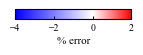

In [43]:
num_negative = int(np.abs(value_min) * 1e2)
num_positive = int(np.abs(value_max) * 1e2)
cmap = plt.get_cmap('bwr', lut=(num_negative + num_positive)*2+1)
index_negative = np.array([int(i) for i in np.linspace(0, num_negative + num_positive - 1, num_negative)])
index_positive = np.array([int(i) for i in np.linspace(num_negative + num_positive + 1, (num_negative + num_positive)*2, num_positive)])
index_all = np.hstack((index_negative, np.array([num_negative + num_positive]), index_positive))
list_color_cmap = [cmap(i) for i in index_all]

fig, ax = plt.subplots(1,1, figsize=(1, 0.13))
ax.axis('off')
cmap = matplotlib.colors.ListedColormap(list_color_cmap)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
cbar = fig.colorbar(mappable, cax=ax.inset_axes([0., 0, 1.5, 1]), location='bottom', orientation='horizontal')
cbar.set_ticks([-4, -2, 0, 2])
cbar.ax.set_xlabel('% error', fontdict={'family': 'times new roman', 'fontsize': 8}, labelpad=2)
cbar.ax.tick_params(direction='in', pad=2, length=2, labelfontfamily='times new roman', labelsize=7)
plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figure6b-6.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

# Figure S9: Correlation between non-uniform E-field simulations and uniform E-field simulations for PLV, PPh, Vm

In [3]:
'''surface mesh'''
# layer 5 roi surface mesh with 1000 elements
L5_surf_roi  = simnibs.read_stl(r'data_paper\Layer5_roi_pymeshlab.stl')
faces        = L5_surf_roi.elm.node_number_list[:, 0:3] - 1
faces_center = L5_surf_roi.elements_baricenters().value
vertices     = L5_surf_roi.nodes.node_coord
cell_normals = L5_surf_roi.triangle_normals().value
# layer 5 roi surface mesh without discretized
L5_surf        = simnibs.read_msh(r'data_paper\Layer5_roi.msh')
faces_0        = L5_surf.elm.node_number_list[:, 0:3] - 1
faces_center_0 = L5_surf.elements_baricenters().value
vertices_0     = L5_surf.nodes.node_coord
cell_normals_0 = L5_surf.triangle_normals().value
'''polarization'''
# unifrom EF
data = pickle.load(open('data_paper/L5PC_Clone4_polarization_ROISurf_uniform_tACS2mA10Hz_EFAtSoma.p', 'rb'))
polarization_uniform = np.array([item[1] for item in data])
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_uniform, function='linear')
polarization_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# nonuniform EF
data = pickle.load(open('data_paper/L5PC_Clone4_polarization_ROISurf_nonUniform_tACS2mA10Hz_scalingFactor2.p', 'rb'))
polarization_nonUniform = np.array([item[1] for item in data])
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_nonUniform, function='linear')
polarization_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# absolute error
polarization_error = polarization_uniform - polarization_nonUniform
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_error, function='linear')
polarization_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# relative error
polarization_error_percent = 100 * (polarization_uniform - polarization_nonUniform) / polarization_nonUniform
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_error_percent, function='linear')
polarization_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
'''phase entrainment'''
# Load phase entrainment of uniform and nonuniform E-field
# unifrom EF
dataPath    = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_uniform.p'
data        = pickle.load(open(dataPath, 'rb'))
plv_uniform = np.array([item[0] for item in data])
pph_uniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_uniform, function='linear')
plv_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
rbf                = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_uniform, function='linear')
pph_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# nonuniform EF
dataPath       = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_nonUniform.p'
data           = pickle.load(open(dataPath, 'rb'))
plv_nonUniform = np.array([item[0] for item in data])
pph_nonUniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                   = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_nonUniform, function='linear')
plv_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
rbf                   = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_nonUniform, function='linear')
pph_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# absolute error
plv_error        = plv_uniform - plv_nonUniform
rbf              = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_error, function='linear')
plv_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

pph_error        = pph_uniform - pph_nonUniform
rbf              = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error, function='linear')
pph_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# relative error
plv_error_percent        = 100 * (plv_uniform - plv_nonUniform) / plv_nonUniform
rbf                      = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_error_percent, function='linear')
plv_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

pph_error_percent        = 100 * (pph_uniform - pph_nonUniform) / pph_nonUniform
rbf                      = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error_percent, function='linear')
pph_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
'''E-field direction in L5 SOI'''
# Load E-fields at the center of elements (soma)
dataPath = r'data_paper\Layer5_popCell_interpolate_Evector_forSectionAndSegment.npy'
data     = np.load(dataPath, allow_pickle=True).item()
popCell_Einterp_section = data['popCell_Einterp_section']
elm_Evectors            = np.array([item[0] for item in popCell_Einterp_section]) # index 0 for soma compartment
elm_Emagnitudes         = np.linalg.norm(elm_Evectors, axis=1)
rbf                     = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], elm_Emagnitudes, function='linear')
elm_Emagnitudes_interp  = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# calculate the E-field direction relative to neuron models in layer 5 SIO
list_theta_layer5, list_phi_layer5 = plot_functions.calc_ROISurfEvec_toOriginEfieldDirection(elm_Evectors, cell_normals)
'''indices'''
# Load three structures indices
data_index          = np.load('data_paper/pre_central_post_indices_original.npy', allow_pickle=True).item()
precentral_indices  = data_index['precentral_indices']
central_indices     = data_index['central_indices']
postcentral_indices = data_index['postcentral_indices']
# Load four regions indices
indices_four_regions = np.load('data_paper/indices_of_four_regions_in_layer5SOI.npy', allow_pickle=True).item()
indicesI   = indices_four_regions['indices_region_I']
indicesII  = indices_four_regions['indices_region_II']
indicesIII = indices_four_regions['indices_region_III']
indicesIV  = indices_four_regions['indices_region_IV']

R2=0.9881 slope=0.9925
R2=0.9983 slope=0.9977
R2=0.9606 slope=1.0702


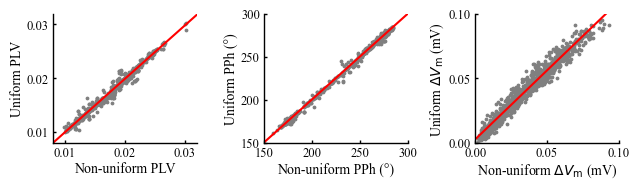

In [5]:
'''PLV: uniform v.s. non-uniform'''
color_scatter = 'gray'
color_line    = 'r'
size_scatter  = 3
fig, ax = plt.subplots(1, 3, figsize=(6.5, 2))
# plv
axi  = ax[0]
x, y = plv_nonUniform, plv_uniform
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
xfit = np.linspace(0.008, 0.034, 200)
yfit = slope * xfit + intercept
R2   = r_value ** 2
axi.scatter(x, y, color=color_scatter, s=size_scatter)
axi.plot(xfit, yfit, color=color_line, lw=1.5)
print('R2=%.4f' % R2, 'slope=%.4f' % slope)
# pph
axi  = ax[1]
x, y = pph_nonUniform, pph_uniform
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
xfit = np.linspace(150, 300, 200)
yfit = slope * xfit + intercept
R2   = r_value ** 2
axi.scatter(x, y, color=color_scatter, s=size_scatter)
axi.plot(xfit, yfit, color=color_line, lw=1.5)
print('R2=%.4f' % R2, 'slope=%.4f' % slope)
# polarization
axi  = ax[2]
x, y = polarization_nonUniform, polarization_uniform
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
xfit = np.linspace(0, 0.1, 200)
yfit = slope * xfit + intercept
R2   = r_value ** 2
axi.scatter(x, y, color=color_scatter, s=size_scatter)
axi.plot(xfit, yfit, color=color_line, lw=1.5)
print('R2=%.4f' % R2, 'slope=%.4f' % slope)

ax[0].set_xlim(0.008, 0.032)
ax[0].set_ylim(0.008, 0.032)
ax[1].set_xlim(150, 300)
ax[1].set_ylim(150, 300)
ax[2].set_xlim(0, 0.1)
ax[2].set_ylim(0, 0.1)

ax[0].set_xticks(np.arange(0.01, 0.031, 0.01))
ax[0].set_yticks(np.arange(0.01, 0.031, 0.01))
ax[1].set_xticks(np.arange(150, 301, 50))
ax[1].set_yticks(np.arange(150, 301, 50))
ax[2].set_xticks(np.arange(0, 0.11, 0.05))
ax[2].set_yticks(np.arange(0, 0.11, 0.05))

for item in [ax[0], ax[1], ax[2]]:
    item.spines['right'].set_color('none')
    item.spines['top'].set_color('none')
    item.spines['bottom'].set_linewidth(1)
    item.spines['left'].set_linewidth(1)
    item.tick_params(axis='both', pad=3, direction='in', labelsize=9, width=1, length=2, labelfontfamily='times new roman')

ax[0].set_ylabel('Uniform PLV', fontsize=10, labelpad=2, fontfamily='times new roman')
ax[0].set_xlabel('Non-uniform PLV', fontsize=10, labelpad=2, fontfamily='times new roman')
ax[1].set_ylabel('Uniform PPh (°)', fontsize=10, labelpad=2, fontfamily='times new roman')
ax[1].set_xlabel('Non-uniform PPh (°)', fontsize=10, labelpad=2, fontfamily='times new roman')
ax[2].set_ylabel(r'Uniform $\Delta V_{\mathrm{m}}$ (mV)', fontsize=10, labelpad=2, fontfamily='times new roman')
ax[2].set_xlabel(r'Non-uniform $\Delta V_{\mathrm{m}}$ (mV)', fontsize=10, labelpad=2, fontfamily='times new roman')

plt.tight_layout(w_pad=0.8, h_pad=0.)
plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figureS6-2.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

# Figure S10: Histograms of the relative erorr for PLV, PPh, Vm

In [8]:
'''surface mesh'''
# layer 5 roi surface mesh with 1000 elements
L5_surf_roi  = simnibs.read_stl(r'data_paper\Layer5_roi_pymeshlab.stl')
faces        = L5_surf_roi.elm.node_number_list[:, 0:3] - 1
faces_center = L5_surf_roi.elements_baricenters().value
vertices     = L5_surf_roi.nodes.node_coord
cell_normals = L5_surf_roi.triangle_normals().value
# layer 5 roi surface mesh without discretized
L5_surf        = simnibs.read_msh(r'data_paper\Layer5_roi.msh')
faces_0        = L5_surf.elm.node_number_list[:, 0:3] - 1
faces_center_0 = L5_surf.elements_baricenters().value
vertices_0     = L5_surf.nodes.node_coord
cell_normals_0 = L5_surf.triangle_normals().value
'''polarization'''
# unifrom EF
data = pickle.load(open('data_paper/L5PC_Clone4_polarization_ROISurf_uniform_tACS2mA10Hz_EFAtSoma.p', 'rb'))
polarization_uniform = np.array([item[1] for item in data])
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_uniform, function='linear')
polarization_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# nonuniform EF
data = pickle.load(open('data_paper/L5PC_Clone4_polarization_ROISurf_nonUniform_tACS2mA10Hz_scalingFactor2.p', 'rb'))
polarization_nonUniform = np.array([item[1] for item in data])
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_nonUniform, function='linear')
polarization_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# absolute error
polarization_error = polarization_uniform - polarization_nonUniform
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_error, function='linear')
polarization_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# relative error
polarization_error_percent = 100 * (polarization_uniform - polarization_nonUniform) / polarization_nonUniform
rbf  = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], polarization_error_percent, function='linear')
polarization_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
'''phase entrainment'''
# Load phase entrainment of uniform and nonuniform E-field
# unifrom EF
dataPath    = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_uniform.p'
data        = pickle.load(open(dataPath, 'rb'))
plv_uniform = np.array([item[0] for item in data])
pph_uniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_uniform, function='linear')
plv_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
rbf                = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_uniform, function='linear')
pph_uniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# nonuniform EF
dataPath       = r'data_paper/L5PC_Clone4_PLV_ROISurf_tACS2mA10Hz_scalingFactor2_1000cells_nonUniform.p'
data           = pickle.load(open(dataPath, 'rb'))
plv_nonUniform = np.array([item[0] for item in data])
pph_nonUniform = np.array([(np.angle(item[2])*180/np.pi + 360) % 360 for item in data])
rbf                   = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_nonUniform, function='linear')
plv_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
rbf                   = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_nonUniform, function='linear')
pph_nonUniform_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# absolute error
plv_error        = plv_uniform - plv_nonUniform
rbf              = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_error, function='linear')
plv_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

pph_error        = pph_uniform - pph_nonUniform
rbf              = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error, function='linear')
pph_error_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# relative error
plv_error_percent        = 100 * (plv_uniform - plv_nonUniform) / plv_nonUniform
rbf                      = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], plv_error_percent, function='linear')
plv_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])

pph_error_percent        = 100 * (pph_uniform - pph_nonUniform) / pph_nonUniform
rbf                      = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], pph_error_percent, function='linear')
pph_error_percent_interp = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
'''E-field direction in L5 SOI'''
# Load E-fields at the center of elements (soma)
dataPath = r'data_paper\Layer5_popCell_interpolate_Evector_forSectionAndSegment.npy'
data     = np.load(dataPath, allow_pickle=True).item()
popCell_Einterp_section = data['popCell_Einterp_section']
elm_Evectors            = np.array([item[0] for item in popCell_Einterp_section]) # index 0 for soma compartment
elm_Emagnitudes         = np.linalg.norm(elm_Evectors, axis=1)
rbf                     = scipy.interpolate.Rbf(faces_center[:,0], faces_center[:,1], faces_center[:,2], elm_Emagnitudes, function='linear')
elm_Emagnitudes_interp  = rbf(faces_center_0[:,0], faces_center_0[:,1], faces_center_0[:,2])
# calculate the E-field direction relative to neuron models in layer 5 SIO
list_theta_layer5, list_phi_layer5 = plot_functions.calc_ROISurfEvec_toOriginEfieldDirection(elm_Evectors, cell_normals)
'''indices'''
# Load three structures indices
data_index          = np.load('data_paper/pre_central_post_indices_original.npy', allow_pickle=True).item()
precentral_indices  = data_index['precentral_indices']
central_indices     = data_index['central_indices']
postcentral_indices = data_index['postcentral_indices']
# Load four regions indices
indices_four_regions = np.load('data_paper/indices_of_four_regions_in_layer5SOI.npy', allow_pickle=True).item()
indicesI   = indices_four_regions['indices_region_I']
indicesII  = indices_four_regions['indices_region_II']
indicesIII = indices_four_regions['indices_region_III']
indicesIV  = indices_four_regions['indices_region_IV']

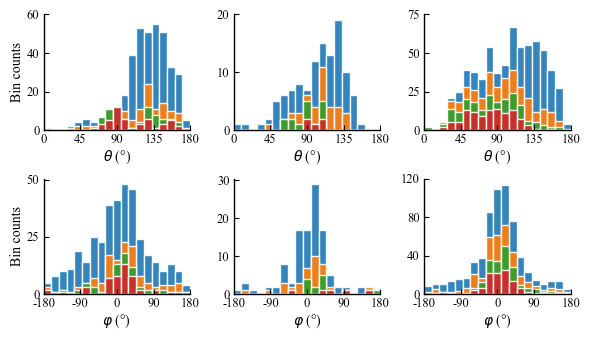

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(6, 3.5))
# PLV
list_threshold = [1, 3, 5, 7]
axi = ax[0, 0]
for i in range(len(list_threshold)):
    data = list_theta_layer5[np.abs(plv_error_percent) > list_threshold[i]]
    bin_counts, bin_edges = np.histogram(data, bins=np.linspace(0, 180, 20))
    bin_centers           = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2
    width                 = (bin_edges[1] - bin_edges[0])
    axi.bar(bin_centers, bin_counts, width=width, ec='white', alpha=0.9, label=r'≥%d' % list_threshold[i])
    
axi = ax[1, 0]
for i in range(len(list_threshold)):
    data = list_phi_layer5[np.abs(plv_error_percent) > list_threshold[i]]
    bin_counts, bin_edges = np.histogram(data, bins=np.linspace(-180, 180, 20))
    bin_centers           = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2
    width                 = (bin_edges[1] - bin_edges[0])
    axi.bar(bin_centers, bin_counts, width=width, ec='white', alpha=0.9)
# PPh
list_threshold = [1, 2, 3, 4]
axi = ax[0, 1]
for i in range(len(list_threshold)):
    data = list_theta_layer5[np.abs(pph_error_percent) > list_threshold[i]]
    bin_counts, bin_edges = np.histogram(data, bins=np.linspace(0, 180, 20))
    bin_centers           = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2
    width                 = (bin_edges[1] - bin_edges[0])
    axi.bar(bin_centers, bin_counts, width=width, ec='white', alpha=0.9, label=r'≥%d' % list_threshold[i])

axi = ax[1, 1]
for i in range(len(list_threshold)):
    data = list_phi_layer5[np.abs(pph_error_percent) > list_threshold[i]]
    bin_counts, bin_edges = np.histogram(data, bins=np.linspace(-180, 180, 20))
    bin_centers           = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2
    width                 = (bin_edges[1] - bin_edges[0])
    axi.bar(bin_centers, bin_counts, width=width, ec='white', alpha=0.9)
# polarization
list_threshold = [10, 20, 30, 40]
axi = ax[0, 2]
for i in range(len(list_threshold)):
    data = list_theta_layer5[np.abs(polarization_error_percent) > list_threshold[i]]
    bin_counts, bin_edges = np.histogram(data, bins=np.linspace(0, 180, 20))
    bin_centers           = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2
    width                 = (bin_edges[1] - bin_edges[0])
    axi.bar(bin_centers, bin_counts, width=width, ec='white', alpha=0.9, label=r'≥%d' % list_threshold[i])

axi = ax[1, 2]
for i in range(len(list_threshold)):
    data = list_phi_layer5[np.abs(polarization_error_percent) > list_threshold[i]]
    bin_counts, bin_edges = np.histogram(data, bins=np.linspace(-180, 180, 20))
    bin_centers           = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2
    width                 = (bin_edges[1] - bin_edges[0])
    axi.bar(bin_centers, bin_counts, width=width, ec='white', alpha=0.9)


# setting
ax[0, 0].set_yticks(np.arange(0, 61, 20))
ax[0, 1].set_yticks(np.arange(0, 21, 10))
ax[0, 2].set_yticks(np.arange(0, 76, 25))
ax[1, 0].set_yticks(np.arange(0, 51, 25))
ax[1, 1].set_yticks(np.arange(0, 31, 10))
ax[1, 2].set_yticks(np.arange(0, 121, 40))
for item in [ax[0,0], ax[0,1], ax[0,2]]:
    item.set_xlim(0, 180)
    item.set_xticks(np.arange(0, 181, 45))
    item.set_xlabel(r'$\theta$ (°)', fontsize=10, family='times new roman', labelpad=1.5)
    # item.legend()
for item in [ax[1,0], ax[1,1], ax[1,2]]:
    item.set_xlim(-180, 180)
    item.set_xticks(np.arange(-180, 181, 90))
    # item.set_xticklabels(['-90', '0', '90', '180', '270'], family='times new roman', fontsize=9)
    item.set_xticklabels(['-180', '-90', '0', '90', '180'], family='times new roman', fontsize=9)
    item.set_xlabel(r'$\varphi$ (°)', fontsize=10, family='times new roman', labelpad=1.5)
ax[0, 0].set_ylabel(r'Bin counts', fontsize=10, family='times new roman', labelpad=2)
ax[1, 0].set_ylabel(r'Bin counts', fontsize=10, family='times new roman', labelpad=2)
    
for item in [ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2]]:
    item.spines['right'].set_color('none')
    item.spines['top'].set_color('none')
    item.spines['bottom'].set_linewidth(1)
    item.spines['left'].set_linewidth(1)
    item.tick_params(axis='x', direction='in', labelsize=9, labelfontfamily='times new roman', pad=3)
    item.tick_params(axis='y', direction='in', labelsize=9, labelfontfamily='times new roman', pad=3)

plt.tight_layout(w_pad=0.8, h_pad=0.6)
plt.savefig(r'C:\Users\Snowp\Desktop\paperFigures\figureS6.tif',format='tif',transparent=True,dpi=600,bbox_inches='tight')

In [30]:
for i in range(1, 13):
    a = np.sort(np.abs(plv_error_percent))
    print(i, np.sum(a<i)/10)

for i in np.arange(5, 85, 5):
    a = np.sort(np.abs(polarization_error_percent))
    # print(i, np.sum(a<i)/10)

print(np.sum(plv_error_percent<=0), np.sum(pph_error_percent>=0), np.sum(polarization_error_percent>=0))

1 61.9
2 81.2
3 86.7
4 89.8
5 92.2
6 94.0
7 95.2
8 96.6
9 96.8
10 97.5
11 98.6
12 99.0
678 653 867
